primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post flight               4330
communications            3840
products and services     3332
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
disability                 403
unaccompanied minor        104
Name: count, dtype: int64


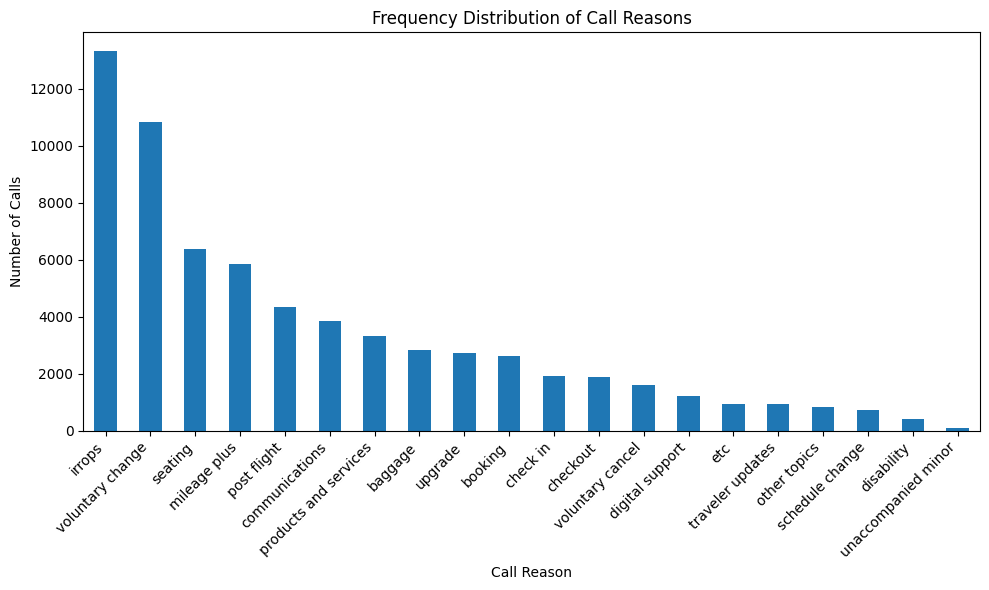

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dff1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate frequency distribution of call reasons
call_reason_distribution = df['primary_call_reason'].value_counts()

# Display the frequency distribution
print(call_reason_distribution)

# Plot the frequency distribution
plt.figure(figsize=(10,6))
call_reason_distribution.plot(kind='bar')
plt.title('Frequency Distribution of Call Reasons')
plt.xlabel('Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
# Data Cleaning

# 1. Drop rows where essential columns are missing
df = df.dropna(subset=['primary_call_reason', 'call_start_datetime', 'call_end_datetime'])

# 2. Convert start and end time columns to datetime
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'], errors='coerce')
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], errors='coerce')

# 3. Remove rows where datetime conversion failed
df = df.dropna(subset=['call_start_datetime', 'call_end_datetime'])

# 4. Ensure call_start_datetime is earlier than call_end_datetime
df = df[df['call_start_datetime'] < df['call_end_datetime']]

# 5. Remove duplicate rows if any
df = df.drop_duplicates()

# 6. Calculate call duration in seconds
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# 7. (Optional) Remove calls with very short (e.g., less than 5 seconds) or excessively long durations (e.g., more than 10,000 seconds)
df = df[(df['call_duration'] > 5) & (df['call_duration'] < 10000)]

# Calculate the average call duration
average_call_duration = df['call_duration'].mean()

# Filter the rows where the call duration is less than the average
below_average_calls = df[df['call_duration'] < average_call_duration]

# Select relevant columns: primary call reason and call duration
below_average_call_reasons = below_average_calls[['primary_call_reason', 'call_duration']]

# Display the results
print(below_average_call_reasons)

# Optional: Sort the results by duration for better readability
below_average_call_reasons_sorted = below_average_call_reasons.sort_values(by='call_duration')

# Display sorted results
print(below_average_call_reasons_sorted)

      primary_call_reason  call_duration
14970             booking          660.0
14972    voluntary cancel         1140.0
14976        other topics          240.0
14977    voluntary change          540.0
14979     digital support          840.0
...                   ...            ...
16197        other topics          480.0
16198    voluntary change          960.0
16200    voluntary change         1020.0
16201            check in          480.0
16202            check in          720.0

[812 rows x 2 columns]
         primary_call_reason  call_duration
15223           other topics          240.0
16046                upgrade          240.0
15998                booking          240.0
16100                booking          240.0
15780  products and services          240.0
...                      ...            ...
16102                 irrops         1140.0
16137       voluntary change         1140.0
16138                seating         1140.0
16160                seating         1140.0


<ipython-input-19-9aba71c36be8>:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'], errors='coerce')


In [20]:
# Convert start and end time columns to datetime
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

# Calculate call duration in seconds
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# Calculate the average call duration
average_call_duration = df['call_duration'].mean()

# Filter the rows where the call duration is less than the average
below_average_calls = df[df['call_duration'] < average_call_duration]

# Select relevant columns: primary call reason and call duration
below_average_call_reasons = below_average_calls[['primary_call_reason', 'call_duration']]

# Display the results
print(below_average_call_reasons)

# Optional: Sort the results by duration for better readability
below_average_call_reasons_sorted = below_average_call_reasons.sort_values(by='call_duration')

# Display sorted results
print(below_average_call_reasons_sorted)

      primary_call_reason  call_duration
14970             booking          660.0
14972    voluntary cancel         1140.0
14976        other topics          240.0
14977    voluntary change          540.0
14979     digital support          840.0
...                   ...            ...
16197        other topics          480.0
16198    voluntary change          960.0
16200    voluntary change         1020.0
16201            check in          480.0
16202            check in          720.0

[812 rows x 2 columns]
         primary_call_reason  call_duration
15223           other topics          240.0
16046                upgrade          240.0
15998                booking          240.0
16100                booking          240.0
15780  products and services          240.0
...                      ...            ...
16102                 irrops         1140.0
16137       voluntary change         1140.0
16138                seating         1140.0
16160                seating         1140.0


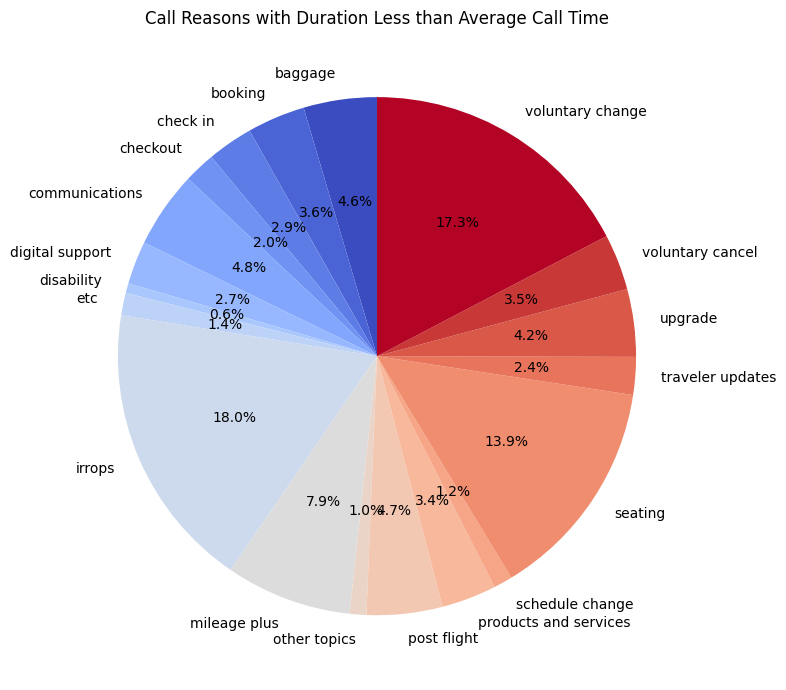

In [21]:
# Convert call start and end times to datetime format
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

# Calculate call duration in seconds
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# Calculate the average call duration
average_call_duration = df['call_duration'].mean()

# Filter the call reasons with call duration less than the average
filtered_df = df[df['call_duration'] < average_call_duration]

# Group by call reason and sum up the durations
call_reason_duration = filtered_df.groupby('primary_call_reason')['call_duration'].sum()

# Plotting the results in a pie chart
plt.figure(figsize=(10,7))
call_reason_duration.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Call Reasons with Duration Less than Average Call Time')
plt.ylabel('')  # Removes y-label for clarity in pie chart
plt.tight_layout()
plt.show()

In [12]:

#Out of these call reasons, the following can be easily handled by the IVR instead of the agent,
# as the most common keyword in he transcript of these is repetitive
#thus increasing the efficiency of the agent and wait time before a call for other customers as well

1. Voluntary Change
2. Voluntary Cancel
3. Upgrade
4. Traveler Updates
5. Seating
6. Products and Services
7. Schedule Change
8. Digital Support


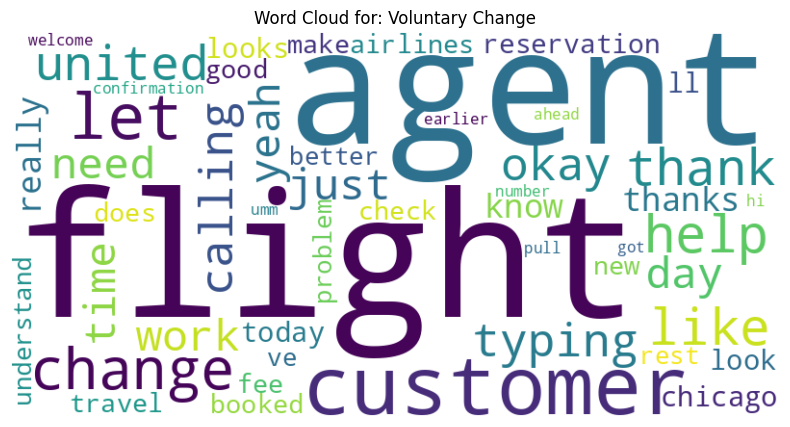

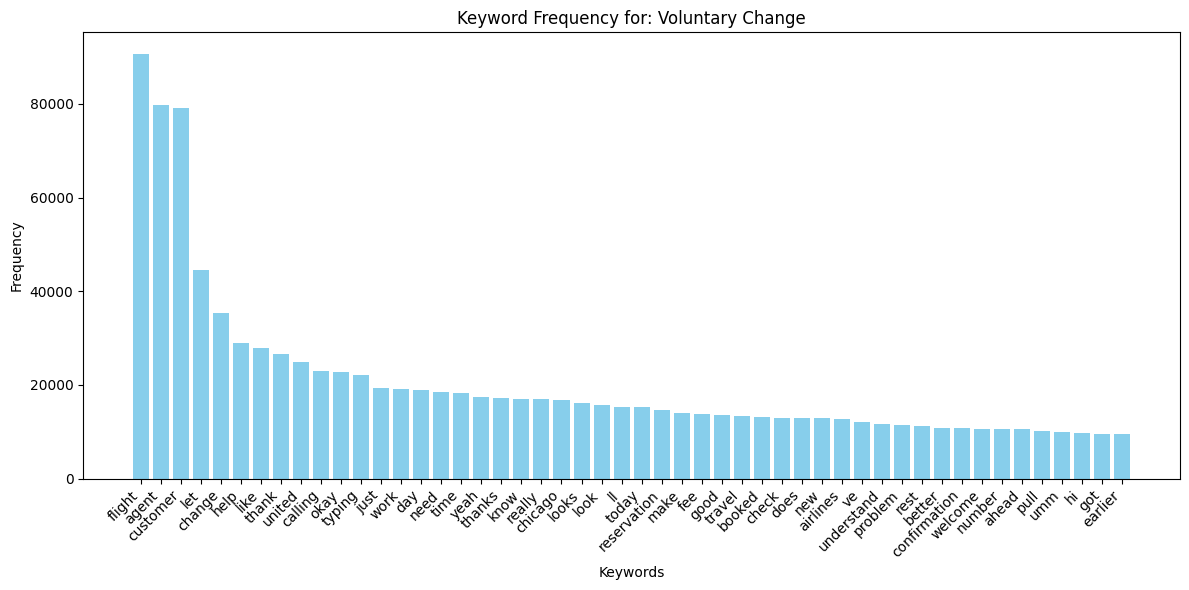

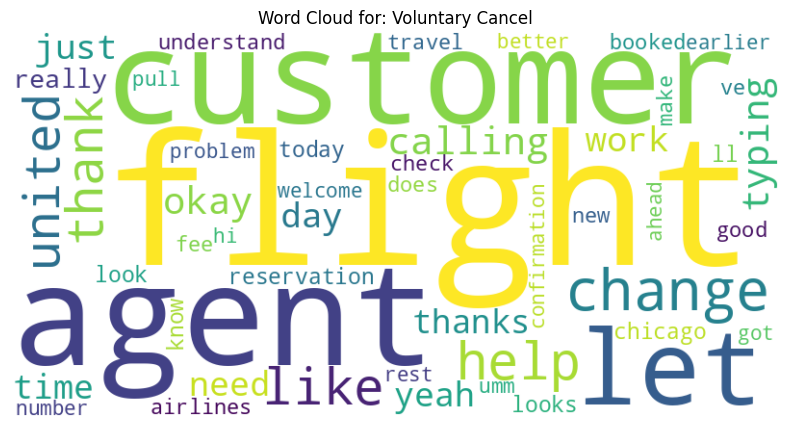

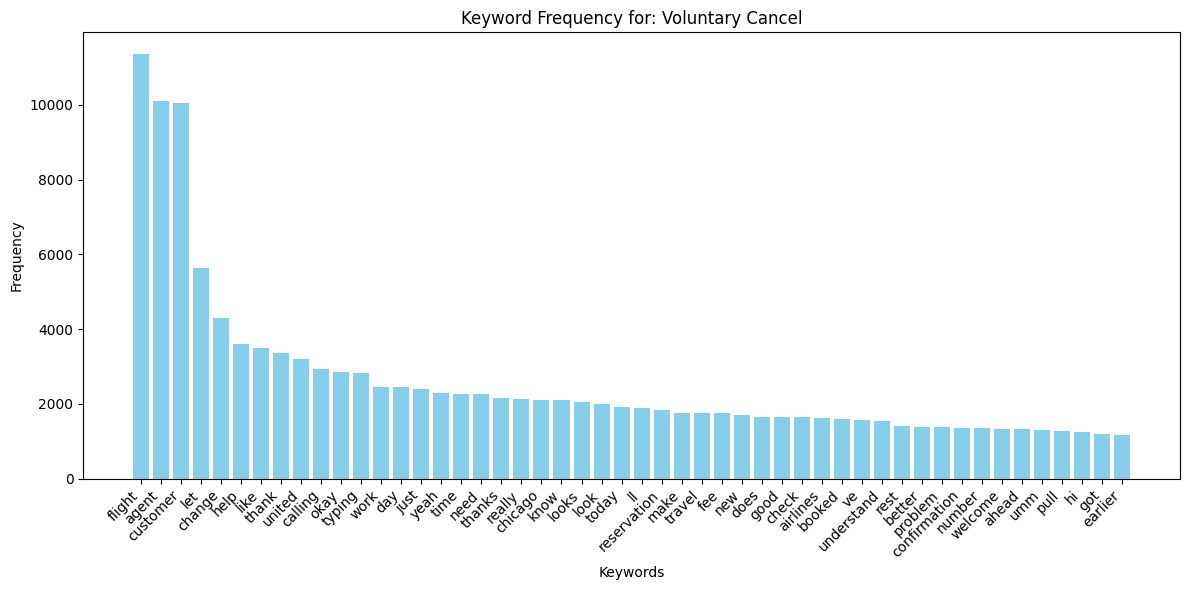

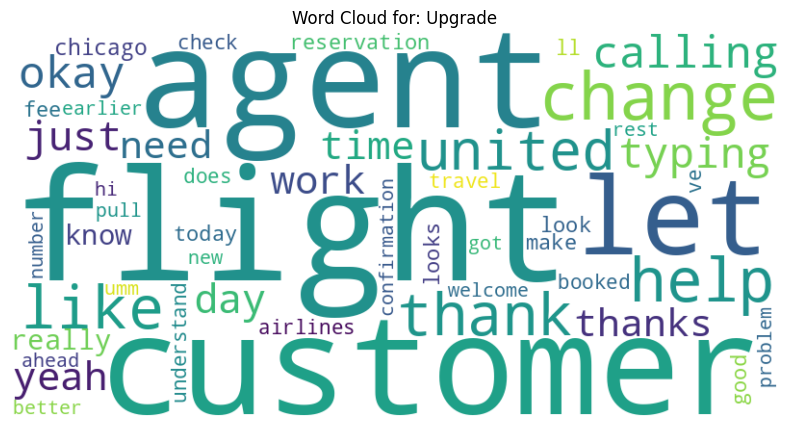

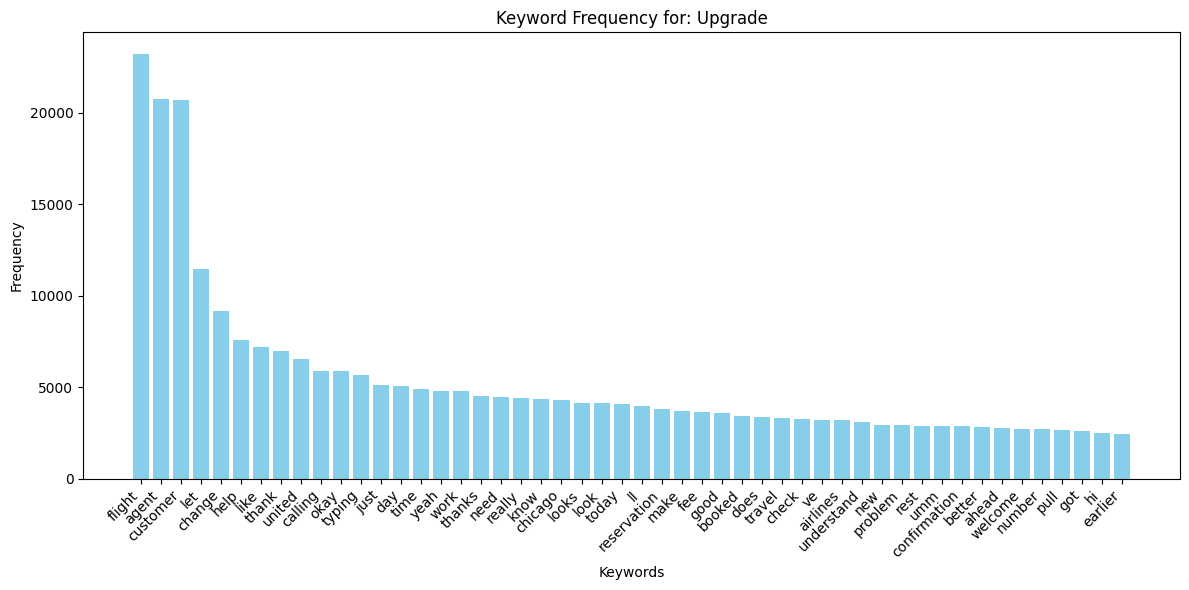

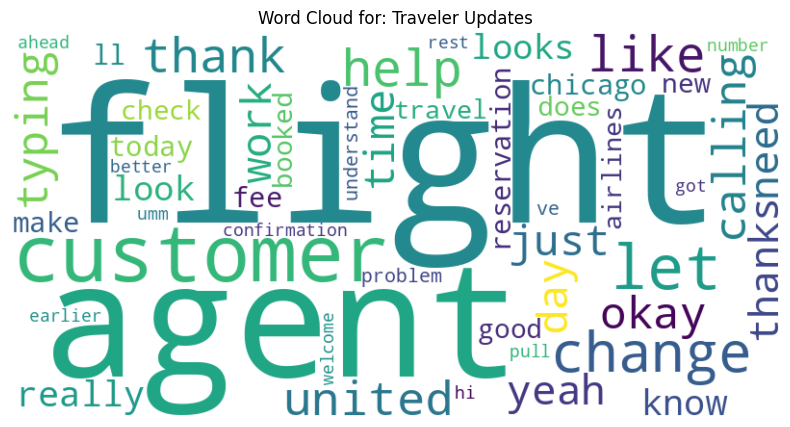

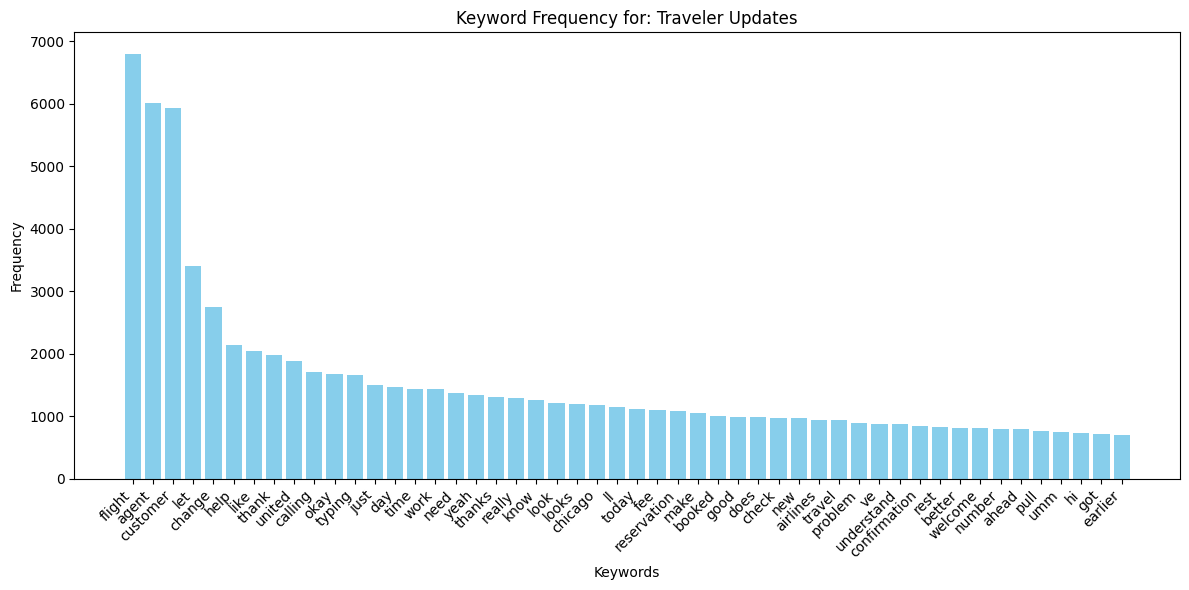

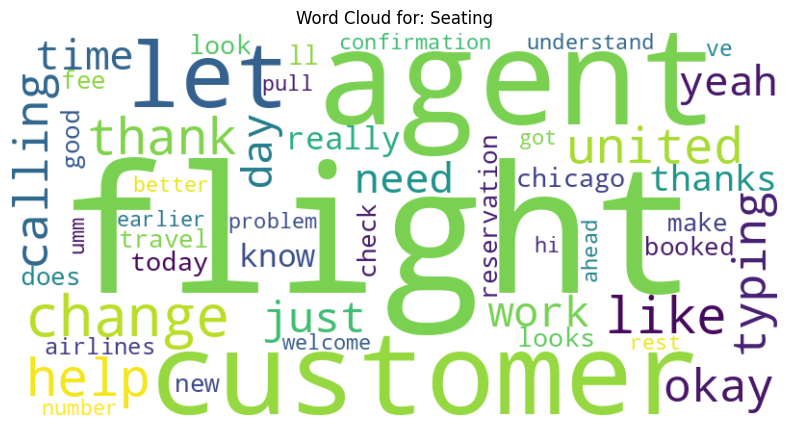

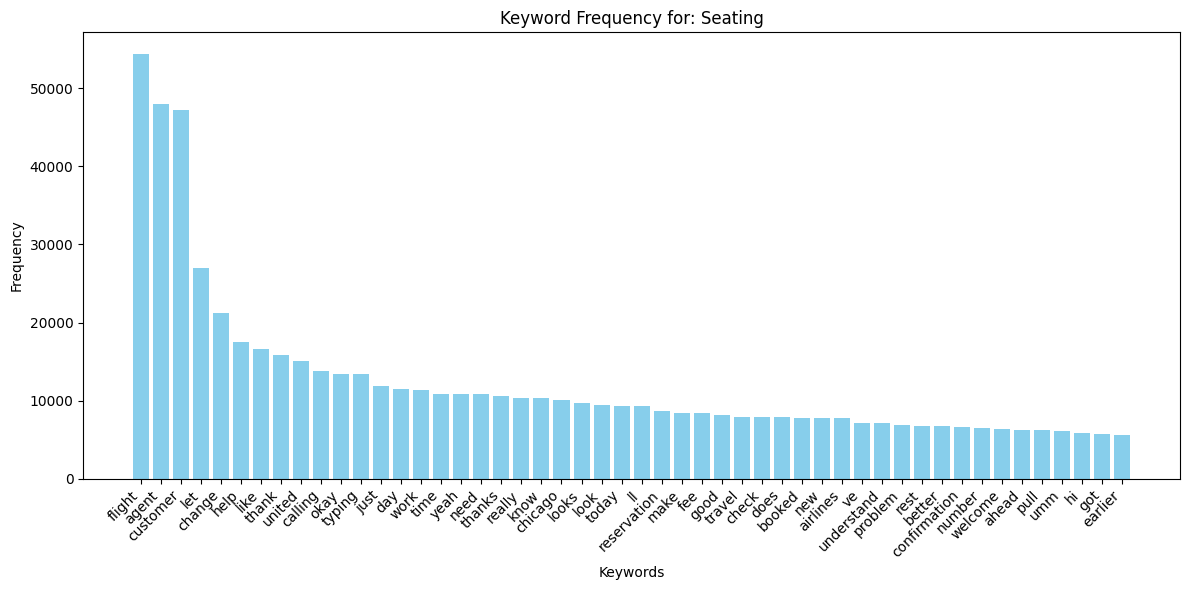

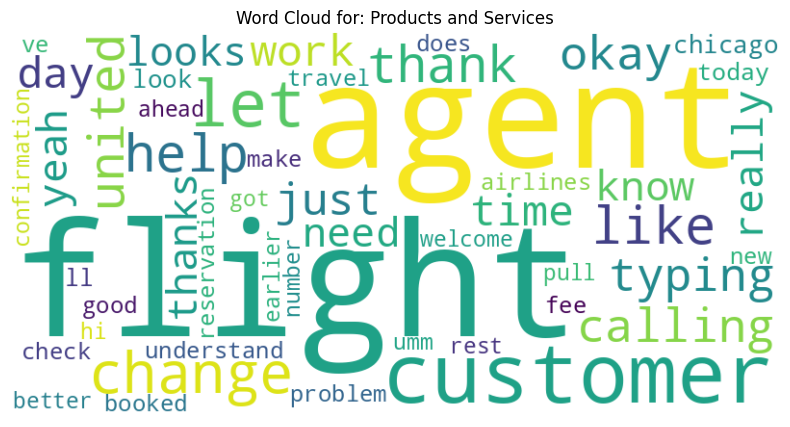

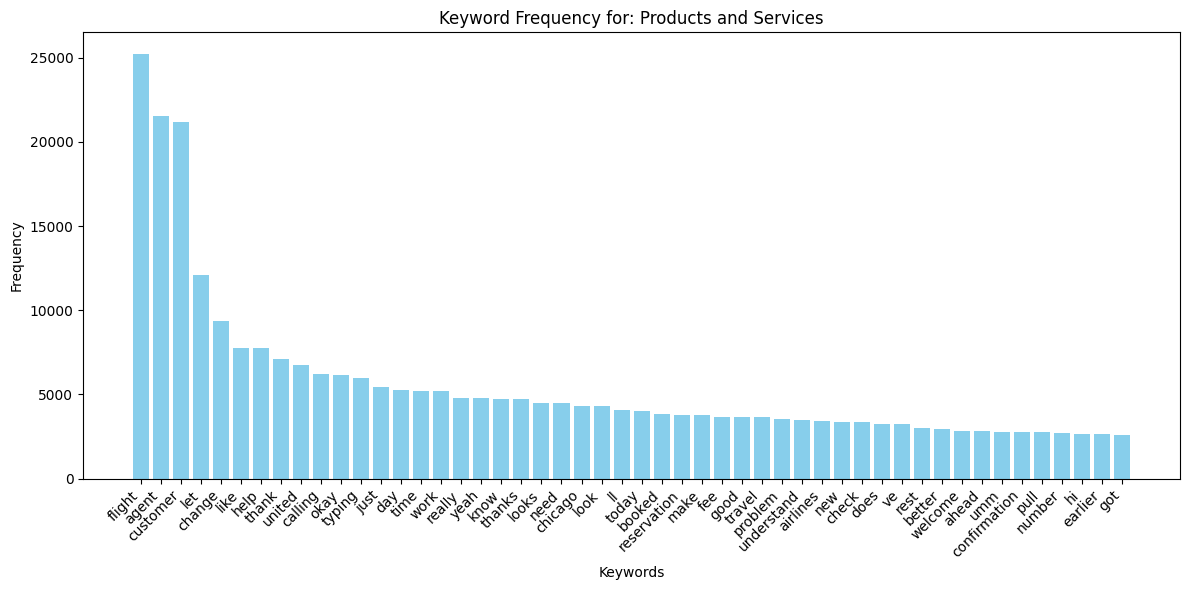

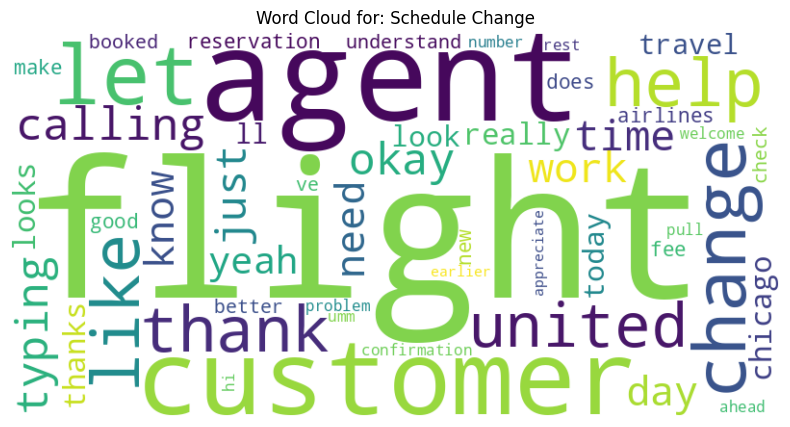

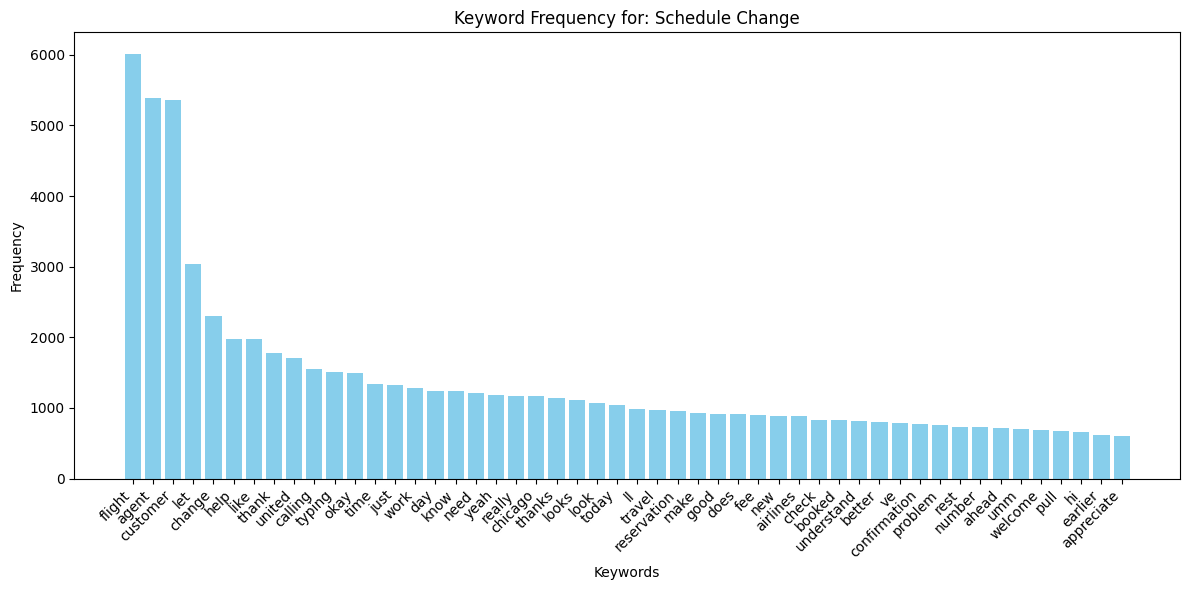

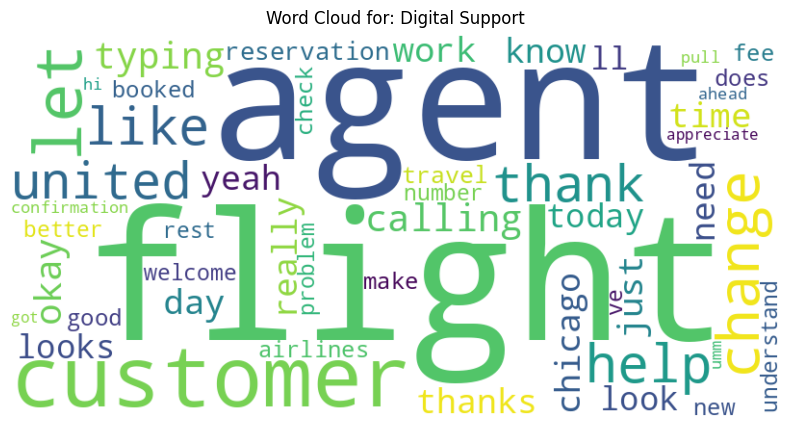

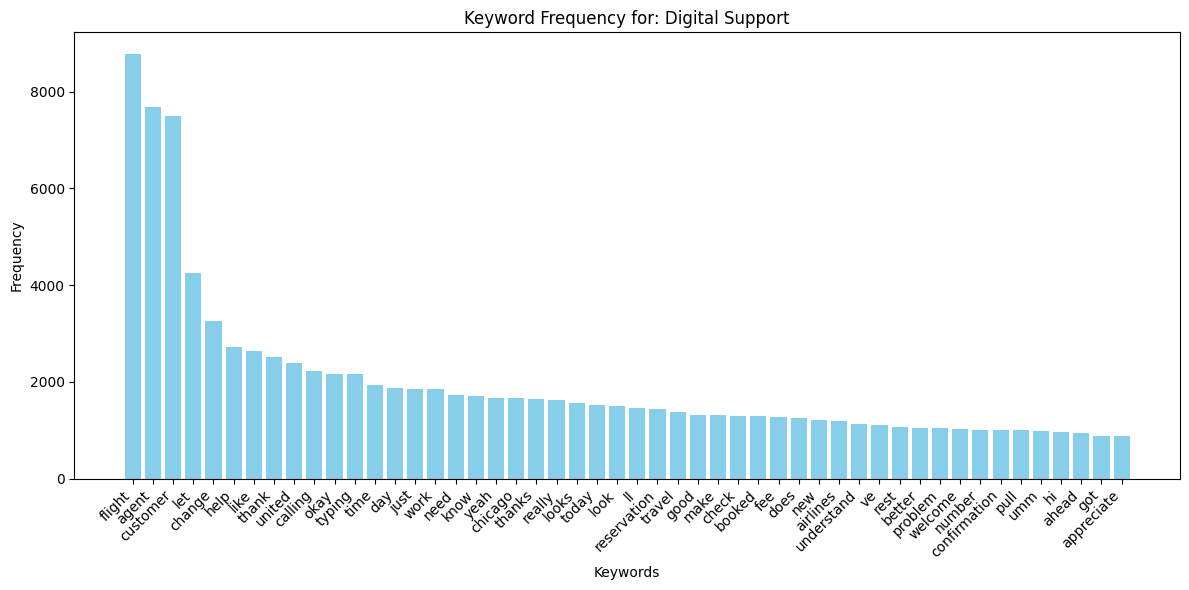


Top Keywords for 'Voluntary Change':
flight: 90719
agent: 79809
customer: 79010
let: 44452
change: 35398
help: 29034
like: 27819
thank: 26646
united: 24822
calling: 22900
okay: 22663
typing: 22196
just: 19339
work: 19024
day: 18861
need: 18454
time: 18309
yeah: 17506
thanks: 17098
know: 17066
really: 16940
chicago: 16696
looks: 16192
look: 15686
ll: 15192
today: 15178
reservation: 14722
make: 13924
fee: 13871
good: 13573
travel: 13355
booked: 13124
check: 12985
does: 12896
new: 12840
airlines: 12705
ve: 12152
understand: 11729
problem: 11422
rest: 11194
better: 10795
confirmation: 10795
welcome: 10590
number: 10579
ahead: 10506
pull: 10169
umm: 9983
hi: 9744
got: 9557
earlier: 9471

Top Keywords for 'Voluntary Cancel':
flight: 11371
agent: 10109
customer: 10061
let: 5625
change: 4307
help: 3603
like: 3481
thank: 3351
united: 3204
calling: 2928
okay: 2842
typing: 2831
work: 2450
day: 2441
just: 2390
yeah: 2298
time: 2262
need: 2261
thanks: 2164
really: 2121
chicago: 2115
know: 2104
loo

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = 'your_dataset.csv'  # Replace with your actual file path
df = pd.read_csv('/content/dff.csv')

# List of call reasons to analyze
call_reasons_of_interest = [
    'Voluntary Change',
    'Voluntary Cancel',
    'Upgrade',
    'Traveler Updates',
    'Seating',
    'Products and Services',
    'Schedule Change',
    'Digital Support'
]

# Create a dictionary to store keywords for each call reason
keywords_dict = {}

for reason in call_reasons_of_interest:
    # Filter transcripts for the current call reason
    transcripts = df[df['primary_call_reason'] == reason]['call_transcript'].dropna()

    # Check if there are transcripts for this call reason
    if not transcripts.empty:
        # Convert transcripts to string type
        transcripts = transcripts.astype(str)

        # Use CountVectorizer to find keywords
        vectorizer = CountVectorizer(stop_words='english', max_features=50)
        X = vectorizer.fit_transform(transcripts)

        # Get the most frequent keywords
        keywords = vectorizer.get_feature_names_out()
        keyword_counts = X.toarray().sum(axis=0)

        # Combine and sort keywords by frequency
        keyword_freq = sorted(zip(keywords, keyword_counts), key=lambda x: x[1], reverse=True)

        # Store the top keywords in the dictionary
        keywords_dict[reason] = keyword_freq

        # Create a word cloud for visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(keyword_freq))

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for: {reason}')
        plt.show()

        # Prepare data for bar graph
        keywords, counts = zip(*keyword_freq)

        # Plot the bar graph
        plt.figure(figsize=(12, 6))
        plt.bar(keywords, counts, color='skyblue')
        plt.title(f'Keyword Frequency for: {reason}')
        plt.xlabel('Keywords')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No transcripts found for '{reason}'.")

# Display grouped keywords by each category
for reason, keywords in keywords_dict.items():
    print(f"\nTop Keywords for '{reason}':")
    for keyword, count in keywords:
        print(f"{keyword}: {count}")
